In [6]:
import nltk.tokenize 

import pandas as pd
fullText = pd.read_csv('MainData_Turkish2.csv',encoding = 'utf-8',delimiter=',') #fullText
#print(fullText)
#all the value of our csv file in column 0 means our disease discription 
diseaseDescription = fullText.iloc[:,0]
diseaseDescription
#all the value of our csv file in column 1 means our label 
diseaseName = fullText.iloc[:,1]
#diseaseName
#print(len(diseaseName))
#print(len(diseaseDescription))

In [16]:
#CHANGE TO LOWERCASE
#diseaseName = [item.lower() for item in diseaseName]
diseaseDescription = [item.lower() for item in diseaseDescription]
#diseaseDescription

In [17]:
#remove white space from start and end of strings
diseaseDescription = [item.strip('') for item in diseaseDescription]
#diseaseDescription

In [18]:
#remove puncutations from diseaseDescription lists
import string
punc = string.punctuation
#print(punc)

diseaseDescriptionListAfterPunctuation = [''.join(char for char in eachItem if char not in string.punctuation) for eachItem in diseaseDescription]
#diseaseDescriptionListAfterPunctuation


In [19]:
#method one
#pip install stop-words
from stop_words import get_stop_words
stop_words = get_stop_words('tr')
stop_words = get_stop_words('turkish')
#for item in stop_words:
#     print(item)

#cleanedData_FromStopWords = [' '.join(w for w in word.split() if w not in stop_words) for word in diseaseDescriptionListAfterPunctuation]
#cleanedData_FromStopWords


#method two is the best for this case
#https://github.com/ahmetax/trstop/blob/master/dosyalar/turkce-stop-words
filee = open("turkishStopWords.txt", "r",encoding="utf-8")
turkishStopWords = filee.read()
turkishStopWords = turkishStopWords.split(',')
# print(turkishStopWords)
# for item in turkishStopWords: 
#     print(item) 

cleanedData_FromStopWords = [' '.join(w for w in word.split() if w not in turkishStopWords) for word in diseaseDescriptionListAfterPunctuation]
#print(cleanedData_FromStopWords)

listt = [item + ',|' for item in cleanedData_FromStopWords]
#listt

In [20]:
# first off all install zeyrek(for lemmitization) which is part of zembrek library
#pip install zeyrek into your env variable
import zeyrek
analyzer = zeyrek.MorphAnalyzer()
Lemmatized_data = [analyzer.lemmatize(item) for item in listt]
#print(Lemmatized_data)
#print(analyzer.lemmatize('incelendi'))


FinishedList = []
for item in Lemmatized_data:
    for member in item:
        FinishedList.append(member[1][0])
                
#print(FinishedList)

bad_char = [',']
resulttt = ' '.join(char for char in FinishedList if not char in bad_char) 
#resulttt
newlist =resulttt.split("|")
#print(newlist)
#remove last index which have just '' item

X = newlist[:-1]
#print(X)

C:\Users\Nina\anaconda3\envs\NLPNew\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


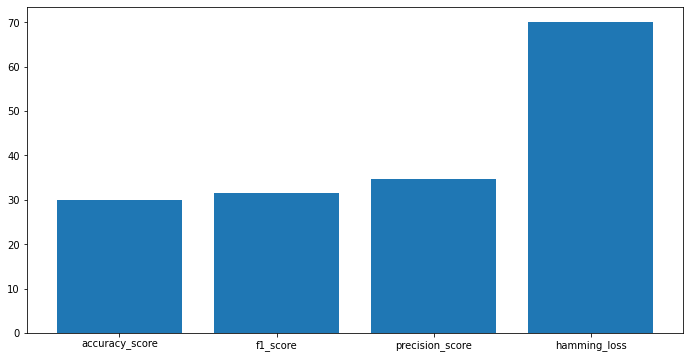

 accuracy_score = 30.0 
 f1_score =  31.428571428571427 
 precision_score =  34.66666666666667 
 hamming_loss =  70.0


In [21]:
# import numpy as np 
# TV = TfidfVectorizer(min_df=8)   
# X = TV.fit_transform(newlist).toarray()
# y = diseaseName
# print(np.shape(X))
# print(np.shape(y))


import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer(min_df=1)


X = TV.fit_transform(X).toarray()
#print(X)
y = diseaseName
#print(np.shape(X))
#print(np.shape(y))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred = model.predict(X_test)




from sklearn.metrics import accuracy_score, f1_score, precision_score,hamming_loss
import skmultilearn


A =accuracy_score(y_test, y_pred)*100
B =f1_score(y_test, y_pred,average='weighted')*100
C =precision_score(y_test, y_pred,average='weighted')*100
L = hamming_loss(y_test,y_pred)*100
#print('accuracy_score = ',A)
#print('f1_score = ',B)
#print('precision_score = ',C)

import matplotlib.pyplot as plt
names = ['accuracy_score', 'f1_score', 'precision_score', 'hamming_loss']
values = [A, B, C, L]
plt.figure(figsize=(40, 6))
plt.subplot(131)
plt.bar(names, values)
plt.show()
print(' accuracy_score =', A,'\n' ,'f1_score = ', B,'\n' ,'precision_score = ',C,'\n' ,'hamming_loss = ', L)
